In [211]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

plt.style.use('seaborn')

https://www.kitplanes.com/homebuilt-accidents-focus-on-vans/?fbclid=IwAR16rMvKRhAimdUmXEr3VduVHuHiNZc0G08vp0zmC9sv46oHW1a6PhQ4E8Q

Load data

In [212]:
all_df = pd.read_csv('data/aircraft.csv')
exp_df = all_df.dropna(subset=['acft_model'])  # [['']]

Get the PIC time data

In [213]:
pilot_df = pd.read_csv('data/flight_time.csv')
pilot_df = pilot_df[pilot_df['flight_type'].str.lower().str.strip().str.contains(pat='totl')]
pilot_df = pilot_df[pilot_df['flight_craft'].str.lower().str.strip().str.contains(pat='all')]
pilot_df = pilot_df[pilot_df['crew_no'] == 1]
pilot_df = pilot_df[['ev_id', 'flight_hours']]

Join the RV and pilot dataframes

In [214]:
vans_df = exp_df[exp_df['acft_model'].str.lower().str.strip().str.contains(pat='rv')]
vans_df = vans_df.merge(pilot_df, on='ev_id')[['acft_model', 'flight_hours', 'ev_id']]

In [215]:
exp_df[exp_df['acft_model'].str.upper().str.strip().str.contains(pat='SEIBERT RV-6')]

,ev_id,Aircraft_Key,regis_no,ntsb_no,acft_missing,far_part,flt_plan_filed,flight_plan_activated,damage,acft_fire,...,acft_year,fuel_on_board,commercial_space_flight,unmanned,ifr_equipped_cert,elt_mounted_aircraft,elt_connected_antenna,elt_manufacturer,elt_model,elt_reason_other
425,20120716X40727,1,N691RV,ERA12LA456,NaN,091,NONE,N,SUBS,NONE,...,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN


Find the incidents per model

In [216]:
rv3 = vans_df[vans_df['acft_model'].str.contains(pat='3')]
rv4 = vans_df[vans_df['acft_model'].str.contains(pat='4')]
rv6 = vans_df[vans_df['acft_model'].str.contains(pat='6')]
rv7 = vans_df[vans_df['acft_model'].str.contains(pat='7')]
rv8 = vans_df[vans_df['acft_model'].str.contains(pat='8')]
rv9 = vans_df[vans_df['acft_model'].str.contains(pat='9')]
rv10 = vans_df[vans_df['acft_model'].str.contains(pat='10')]
rv12 = vans_df[vans_df['acft_model'].str.contains(pat='12')]

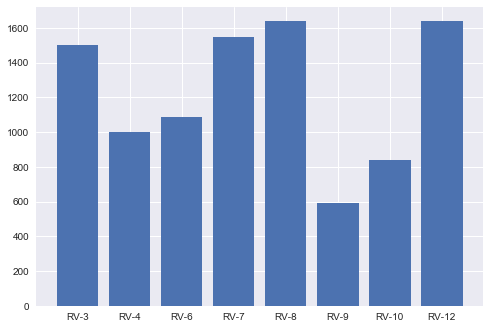

In [217]:
med3 = rv3['flight_hours'].median()
med4 = rv4['flight_hours'].median()
med6 = rv6['flight_hours'].median()
med7 = rv7['flight_hours'].median()
med8 = rv8['flight_hours'].median()
med9 = rv9['flight_hours'].median()
med10 = rv10['flight_hours'].median()
med12 =rv12['flight_hours'].median()
names = ['RV-3', 'RV-4', 'RV-6', 'RV-7', 'RV-8', 'RV-9', 'RV-10', 'RV-12']
meds = [med3, med4, med6, med7, med8, med9, med10, med12]
plt.bar(names, meds)
plt.show()

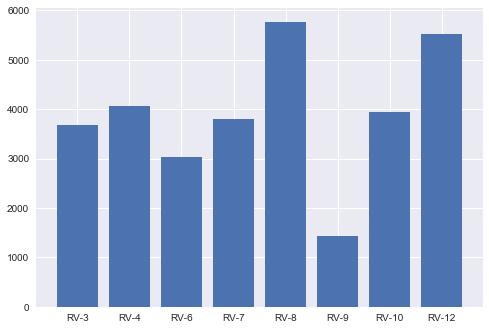

In [218]:
names = ['RV-3', 'RV-4', 'RV-6', 'RV-7', 'RV-8', 'RV-9', 'RV-10', 'RV-12']
avg3 = rv3['flight_hours'].mean()
avg4 = rv4['flight_hours'].mean()
avg6 = rv6['flight_hours'].mean()
avg7 = rv7['flight_hours'].mean()
avg8 = rv8['flight_hours'].mean()
avg9 = rv9['flight_hours'].mean()
avg10 = rv10['flight_hours'].mean()
avg12 = rv12['flight_hours'].mean()
avgs = [avg3, avg4, avg6, avg7, avg8, avg9, avg10, avg12]
plt.bar(names, avgs)
plt.show()

In [219]:
rv6a_filter = vans_df['acft_model'].str.contains(pat='6A')
print(rv6a_filter)

0      False
1      False
2      False
3       True
4      False
       ...  
749    False
750    False
751    False
752    False
753    False
Name: acft_model, Length: 754, dtype: bool


In [220]:
rv6 = vans_df[vans_df['acft_model'].str.contains(pat='6')]
rv6a = rv6[rv6['acft_model'].str.upper().str.contains(pat='6A')]
rv6 = rv6[~rv6['acft_model'].str.upper().str.contains(pat='6A')]

In [221]:
rv6a

,acft_model,flight_hours,ev_id
3,RV6A,1510.0,20090113X55612
14,Vans RV-6A,3586.0,20030701X00988
17,RV-6A,326.0,20020619X00926
23,RV6A,627.0,20150924X81420
24,RV-6A,1706.0,20040721X01021
...,...,...,...
716,RV-6A,872.0,20110614X95920
717,RV-6A,529.0,20040915X01438
720,VANS RV6A,172.0,20150414X13339
723,RV-6A,1798.0,20070531X00675


In [240]:
findings_df = pd.read_csv('data/Findings.csv')
findings_df.head(5)

,ev_id,Aircraft_Key,finding_no,finding_code,category_no,subcategory_no,section_no,finding_description,subsection_no,modifier_no,Cause_Factor,lchg_date,lchg_userid
0,20181125X85246,1,1,106202220,1,6,20,Aircraft-Aircraft oper/perf/capability-Perform...,22,20,C,07/08/19 18:40:13,seak
1,20181125X85246,1,2,206304044,2,6,30,Personnel issues-Task performance-Use of equip...,40,44,C,07/08/19 18:40:13,seak
2,20120214X84853,1,1,106203711,1,6,20,Aircraft-Aircraft oper/perf/capability-Perform...,37,11,C,03/23/12 18:30:45,snyg
3,20120214X84853,1,2,204101544,2,4,10,Personnel issues-Action/decision-Action-Incorr...,15,44,C,03/23/12 18:30:45,snyg
4,20170103X43747,1,1,500000000,5,0,0,Not determined-Not determined-(general)-(gener...,0,0,C,05/28/19 16:22:12,seak


In [241]:
findings_df = findings_df[findings_df['finding_description'].str.strip().str.contains(pat='Aircraft-Aircraft oper/perf/capability-Performance/control')][['ev_id', 'finding_description']]

In [242]:
control_df = findings_df[findings_df['finding_description'].str.lower().str.strip().str.contains(pat='control')][['ev_id']]
control_df = control_df['ev_id']
control_df = control_df.drop_duplicates()

In [243]:
rv6 = rv6.merge(control_df, on='ev_id')[['acft_model', 'flight_hours', 'ev_id']]
rv6a = rv6a.merge(control_df, on='ev_id')[['acft_model', 'flight_hours', 'ev_id']]

In [244]:
rv6

,acft_model,flight_hours,ev_id
0,SEIBERT RV-6,215.000000,20120716X40727
1,RV 6,358.000000,20160517X14712
2,RV6,1000.000000,20130924X12323
3,RV 6,2272.000000,20160902X31547
4,RV 6,2272.000000,20160902X31547
5,RV6,350.799988,20161108X95143
6,RV-6,262.000000,20150501X44241
7,RV-6,6000.000000,20090827X63417
8,RV6-A,756.000000,20090609X22257
9,RV 6,752.000000,20180730X45055
